In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X = mnist['data']
y = mnist['target']
# X, y = mnist['data'], mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
28 * 28

784

In [7]:
y.shape

(70000,)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [13]:
def plot_sample(i):
    plt.imshow(X[i].reshape(28, 28), cmap='binary')
    plt.axis('off')
    plt.title(y[i])
    plt.show()

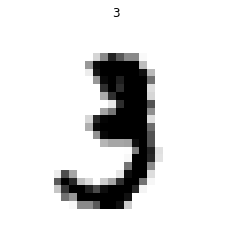

In [15]:
plot_sample(10)

In [16]:
y[0]

'5'

In [18]:
import numpy as np

In [19]:
y = y.astype(np.uint8)
y[0]

5

In [20]:
# hold-out
training_size = 60000
X_train, X_test, y_train, y_test = X[:training_size], X[training_size:], y[:training_size], y[training_size:]

(array([6903., 7877., 6990., 7141., 6824., 6313., 6876., 7293., 6825.,
        6958.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 10 artists>)

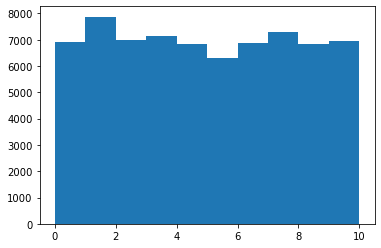

In [29]:
plt.hist(y, bins=range(11))

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 10 artists>)

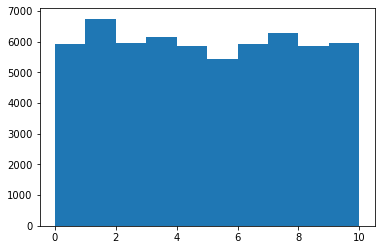

In [30]:
plt.hist(y_train, bins=range(11))

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 10 artists>)

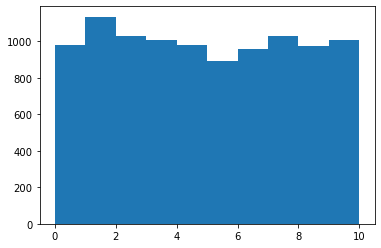

In [31]:
plt.hist(y_test, bins=range(11))

# Constructing a binary classifier: `3-classifier`

In [32]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

In [33]:
y_train_3[:10]

array([False, False, False, False, False, False, False,  True, False,
       False])

We are using Stochastic Gradient Descent (SGD) classifier

In [34]:
from sklearn.linear_model import SGDClassifier

In [122]:
sgd_clf = SGDClassifier(random_state=43)

In [35]:
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(random_state=110)

In [37]:
sgd_clf.predict([X_train[10]])

array([ True])

In [38]:
sgd_clf.predict(X_train[10].reshape(1, -1))

array([ True])

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
cross_val_score(sgd_clf, X_train, y_train_3, cv=5, scoring='accuracy')

array([0.96141667, 0.95875   , 0.96975   , 0.95791667, 0.96658333])

In [41]:
from sklearn.base import BaseEstimator

In [42]:
class Never3Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [43]:
never3_clf = Never3Classifier()

In [44]:
cross_val_score(never3_clf, X_train, y_train_3, cv=5, scoring='accuracy')

array([0.89766667, 0.89508333, 0.89975   , 0.90008333, 0.8965    ])

In [45]:
6131/60000

0.10218333333333333

In [49]:
from sklearn.model_selection import cross_val_predict

In [51]:
from sklearn.metrics import confusion_matrix 

In [53]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=5)
confusion_matrix(y_train_3, y_train_pred)

array([[52886,   983],
       [ 1244,  4887]], dtype=int64)

In [48]:
from sklearn.metrics import precision_score, recall_score

In [54]:
precision_score(y_train_3, y_train_pred)

0.8325383304940375

In [55]:
recall_score(y_train_3, y_train_pred)

0.7970967215788616

In [56]:
y_train_pred = cross_val_predict(never3_clf, X_train, y_train_3, cv=5)

In [57]:
confusion_matrix(y_train_3, y_train_pred)

array([[53869,     0],
       [ 6131,     0]], dtype=int64)

In [58]:
precision_score(y_train_3, y_train_pred)

C:\Users\ali\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [59]:
recall_score(y_train_3, y_train_pred)

0.0

In [64]:
y_scores = sgd_clf.decision_function(X_train[0].reshape(1,-1))

In [65]:
y_scoress

array([-83.0986957])

In [68]:
y_train_3[0]

False

In [69]:
threshold = 0
y_pred_threshold = (y_scores > threshold)
y_pred_threshold

array([False])

In [70]:
threshold = -100
y_pred_threshold = (y_scores > threshold)
y_pred_threshold

array([ True])

In [73]:
y_train_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=5, method='decision_function')

In [74]:
from sklearn.metrics import precision_recall_curve

In [75]:
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_train_scores)

In [76]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
    plt.legend()
    plt.show()

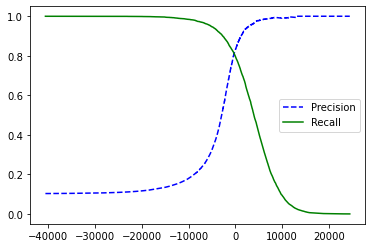

In [77]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [78]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b--')
    plt.show()

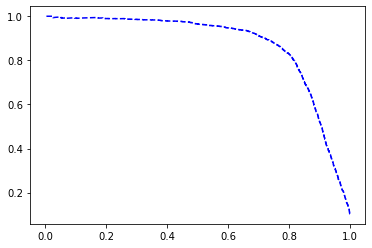

In [79]:
plot_precision_vs_recall(precisions, recalls)

In [80]:
threshold_90_precision = thresholds[np.argmax(precisions >= .9)]
threshold_90_precision

1192.3564746830755

In [81]:
y_train_predi_90 = (y_train_scores >= threshold_90_precision)

In [82]:
precision_score(y_train_3, y_train_predi_90)

0.9000406338886632

In [83]:
recall_score(y_train_3, y_train_predi_90)

0.7225574946990703

In [84]:
from sklearn.metrics import roc_curve

In [85]:
fpr, tpr, thresholds = roc_curve(y_train_3, y_train_scores)

In [90]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

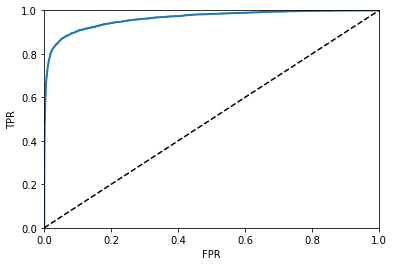

In [91]:
plot_roc_curve(fpr, tpr)

In [92]:
from sklearn.metrics import roc_auc_score

In [93]:
roc_auc_score(y_train_3, y_train_scores)

0.9630495776225644

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
forest_clf = RandomForestClassifier(random_state=110)
y_prob_forest_3 = cross_val_predict(forest_clf, X_train, y_train_3, cv=5, method='predict_proba')

In [96]:
y_scores_forest_3 = y_prob_forest_3[:, 1] # score = probability of the positive class

In [97]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_3, y_scores_forest_3)

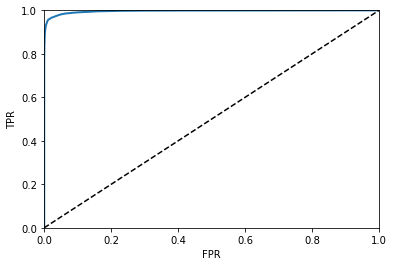

In [98]:
plot_roc_curve(fpr_forest, tpr_forest)

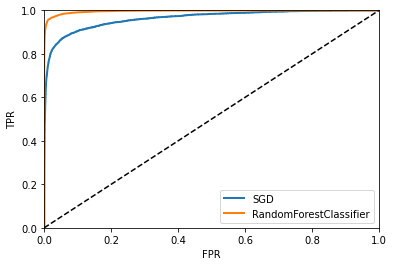

In [99]:
plt.plot(fpr, tpr, linewidth=2, label='SGD')
plt.plot(fpr_forest, tpr_forest, linewidth=2, label='RandomForestClassifier')
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [101]:
roc_auc_score(y_train_3, y_scores_forest_3)

0.9961723278269807

In [102]:
from sklearn.svm import SVC

In [103]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [104]:
svm_clf.predict(X_train[0].reshape(1, -1))

array([5], dtype=uint8)

In [105]:
y_train[0]

5

In [106]:
sample_scores = svm_clf.decision_function(X_train[0].reshape(1,-1))
sample_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [107]:
np.argmax(sample_scores)

5

In [108]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [109]:
from sklearn.multiclass import OneVsRestClassifier

In [110]:
ovr_svm_clf = OneVsRestClassifier(SVC())
ovr_svm_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [111]:
ovr_svm_clf.predict(X_train[0].reshape(1,-1))

array([5], dtype=uint8)

In [112]:
len(ovr_svm_clf.estimators_)

10

In [113]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=110)

In [114]:
sgd_clf.decision_function(X_train[0].reshape(1,-1))

array([[-26894.57678994, -26538.36853388, -11400.93495367,
            38.48161519, -27255.5315802 ,    634.40908759,
        -33834.01545803, -15633.1000164 ,  -8604.71174471,
         -8671.61698032]])

In [115]:
cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring='accuracy')

array([0.84166667, 0.85583333, 0.87991667, 0.86408333, 0.89283333])

In [118]:
np.mean([0.84166667, 0.85583333, 0.87991667, 0.86408333, 0.89283333])

0.866866666

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [123]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')

C:\Users\ali\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.90383333, 0.90008333, 0.89483333, 0.89083333, 0.90125   ])

In [124]:
np.mean([0.90383333, 0.90008333, 0.89483333, 0.89083333, 0.90125])

0.898166664

In [125]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=5)

C:\Users\ali\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [126]:
conf_matrix = confusion_matrix(y_train, y_train_pred)

In [127]:
conf_matrix

array([[5573,    0,   17,    6,    9,   49,   34,    6,  228,    1],
       [   0, 6416,   42,   23,    3,   41,    4,    7,  196,   10],
       [  24,   26, 5240,   86,   69,   26,   61,   41,  376,    9],
       [  25,   16,  108, 5226,    0,  194,   24,   39,  431,   68],
       [  10,   14,   43,   10, 5214,   10,   33,   23,  336,  149],
       [  27,   18,   28,  159,   52, 4451,   79,   16,  533,   58],
       [  28,   17,   41,    3,   42,   90, 5548,    8,  141,    0],
       [  18,   12,   55,   26,   50,   14,    4, 5694,  199,  193],
       [  13,   61,   41,   85,    3,  120,   28,    8, 5456,   36],
       [  21,   19,   33,   58,  117,   35,    1,  179,  414, 5072]],
      dtype=int64)

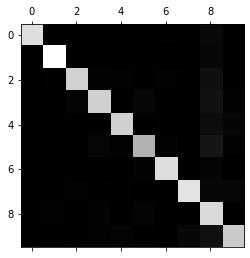

In [128]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

In [129]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums

In [130]:
np.fill_diagonal(norm_conf_matrix, 0)

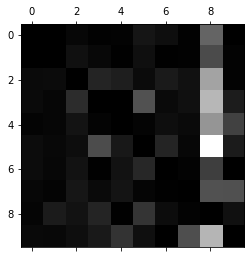

In [131]:
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show()

In [132]:
class_a = 3
class_b = 5
X_aa = X_train[(y_train == class_a) & (y_train_pred == class_a)]
X_ab = X_train[(y_train == class_a) & (y_train_pred == class_b)]
X_ba = X_train[(y_train == class_b) & (y_train_pred == class_a)]
X_bb = X_train[(y_train == class_b) & (y_train_pred == class_b)]

In [134]:
def plot_samples(instances, image_per_row=5, size=28, **options):
    image_per_row = min(image_per_row, len(instances))
    images = [x.reshape(size, size) for x in instances]
    n_rows = (len(instances) - 1) // image_per_row + 1
    row_images = []
    n_empty = n_rows * image_per_row - len(instances)
    for row in range(n_rows):
        r_img = images[row * image_per_row : (row + 1) * image_per_row]
        row_images.append(np.concatenate(r_img, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap='binary', **options)
    plt.axis('off')

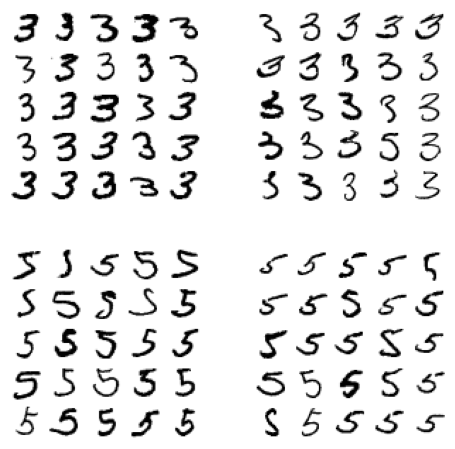

In [135]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_samples(X_aa[:25], image_per_row=5, size=28)
plt.subplot(222); plot_samples(X_ab[:25], image_per_row=5, size=28)
plt.subplot(223); plot_samples(X_ba[:25], image_per_row=5, size=28)
plt.subplot(224); plot_samples(X_bb[:25], image_per_row=5, size=28)
plt.show()